In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing


In [13]:
#データを変数に格納
data_housing = fetch_california_housing()

#データの中身を確認
print(data_housing.DESCR)

#データフレームに変換
real_estate = pd.DataFrame(data_housing.data, columns=data_housing.feature_names)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [14]:
# 目的変数（住宅価格の中央値）を取得
target = data_housing.target

# 目的変数を表示
print("目的変数",target)

#目的変数をPriceとしてデータフレームに追加
real_estate["Price"] = data_housing.target

#特微量の列名の表示
print("列名",real_estate.columns.values)

#先頭の5つを表示
print(real_estate.head())


目的変数 [4.526 3.585 3.521 ... 0.923 0.847 0.894]
列名 ['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude' 'Price']
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [16]:
real_estate.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [17]:
#基本情報の確認
print(real_estate.info())

#データの統計的な概要を確認
print(real_estate.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

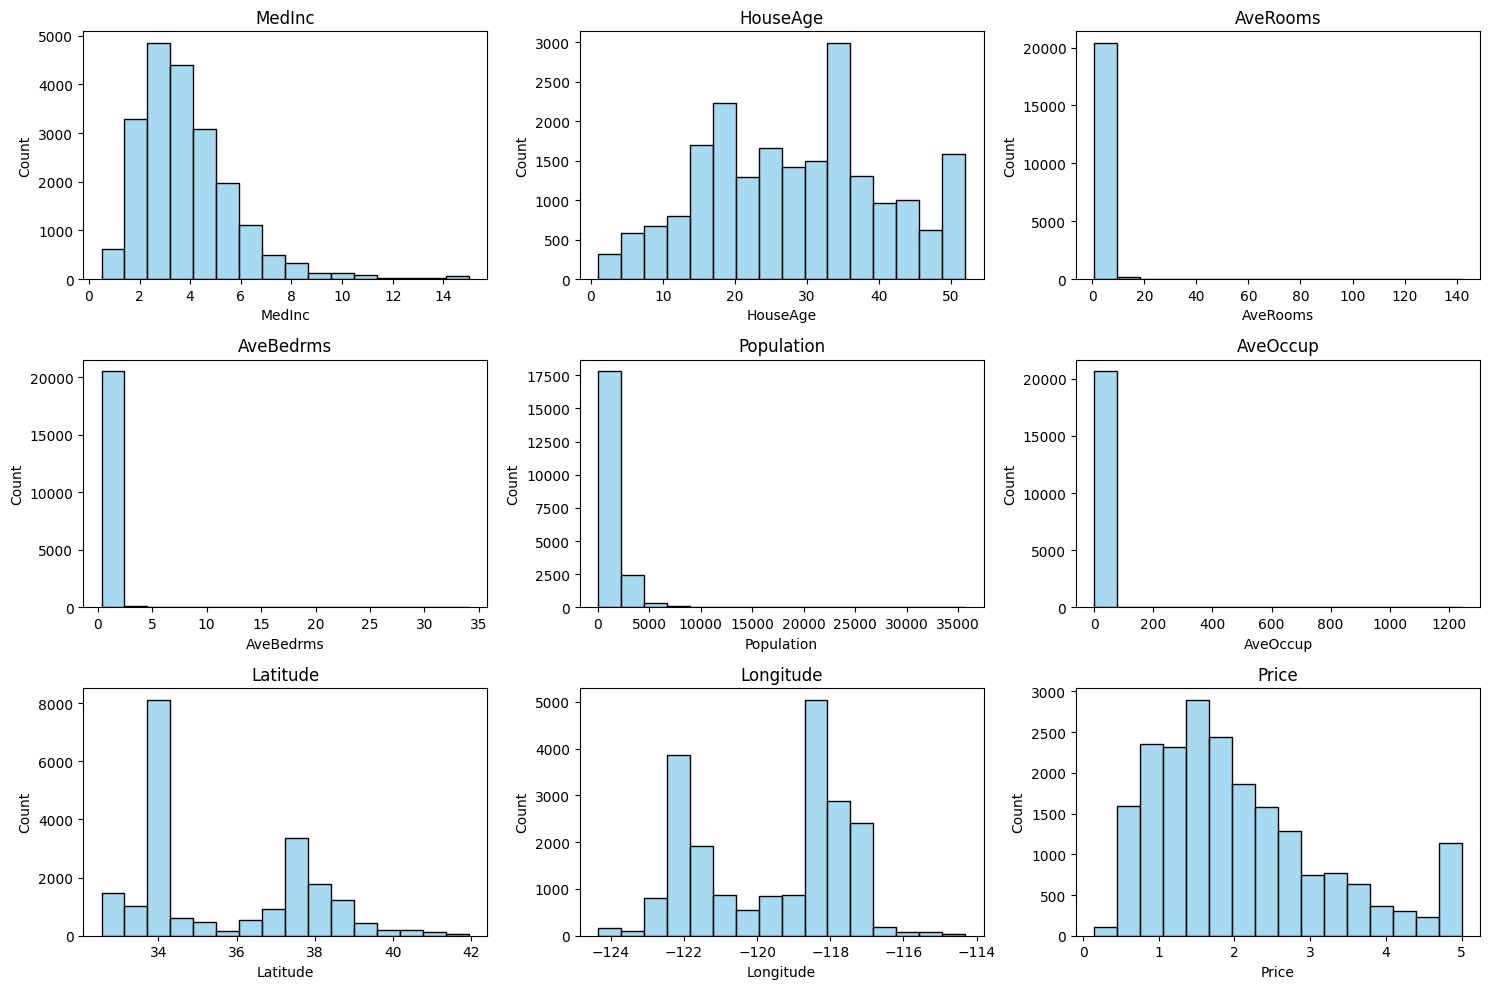

In [18]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(real_estate.columns):
    plt.subplot(3, 3, i+1)  # 3x3のサブプロット
    sns.histplot(real_estate[column], bins=16, kde=False, color='skyblue')
    plt.title(f"{column}")

plt.tight_layout()  # レイアウトの調整
plt.show()


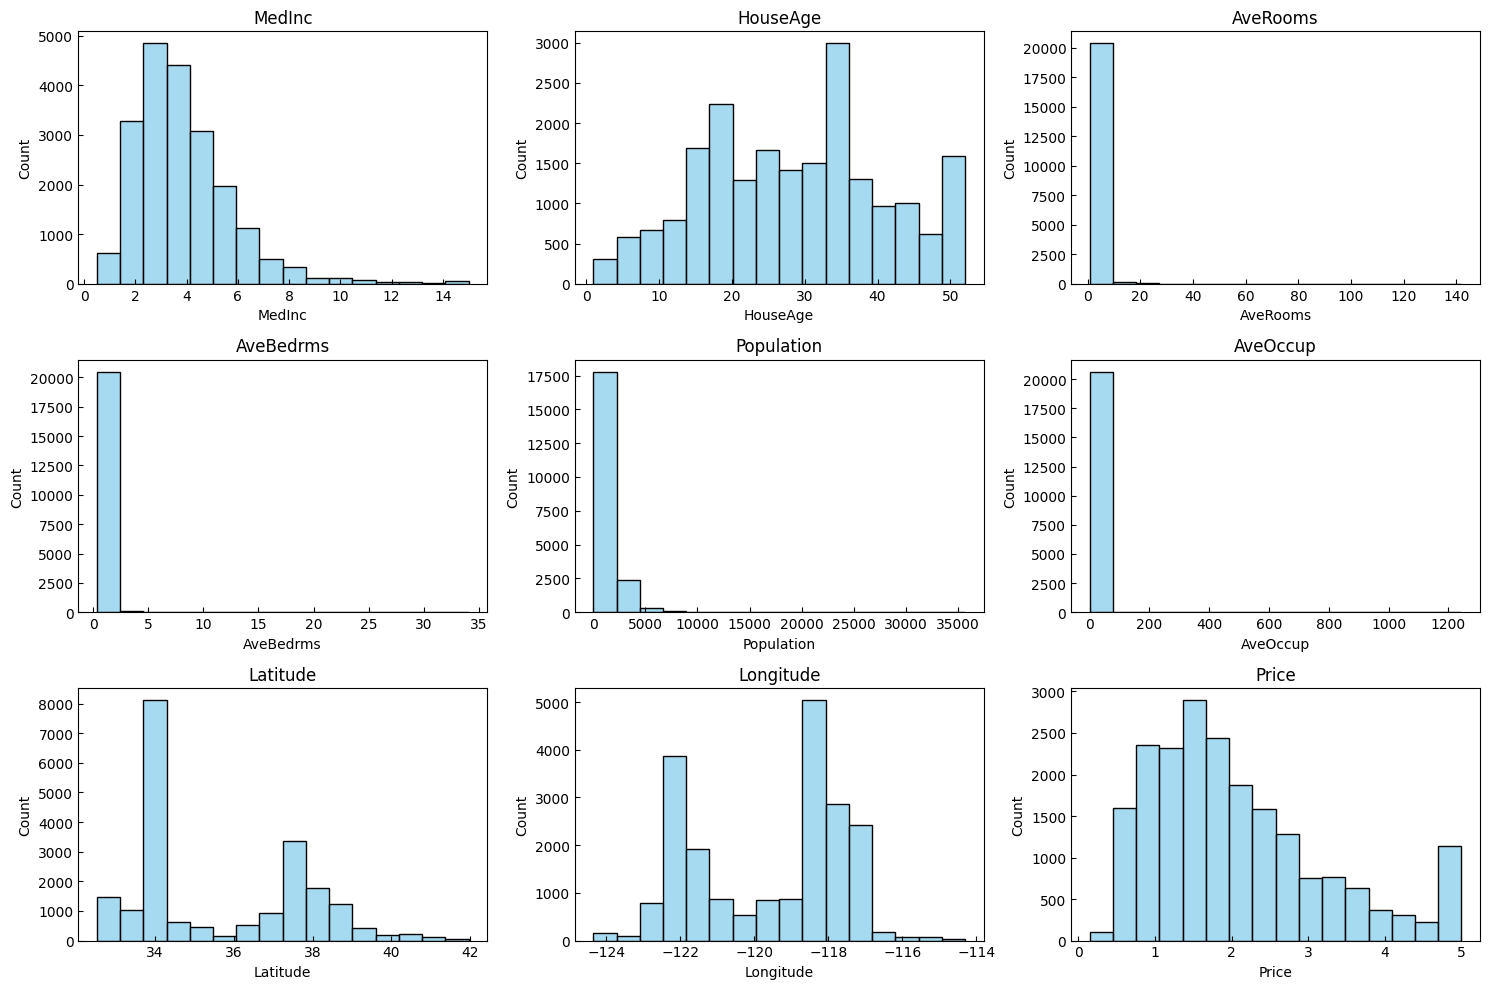

In [21]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(real_estate.columns):
    plt.subplot(3, 3, i+1)  # 3x3のサブプロット
    sns.histplot(real_estate[column], bins=16, kde=False, color='skyblue')
    plt.title(f"{column}")
    plt.tick_params(axis='both', direction='in')  # 目盛り線を内側に

plt.tight_layout()  # レイアウトの調整
plt.show()


<Axes: xlabel='AveRooms', ylabel='AveBedrms'>

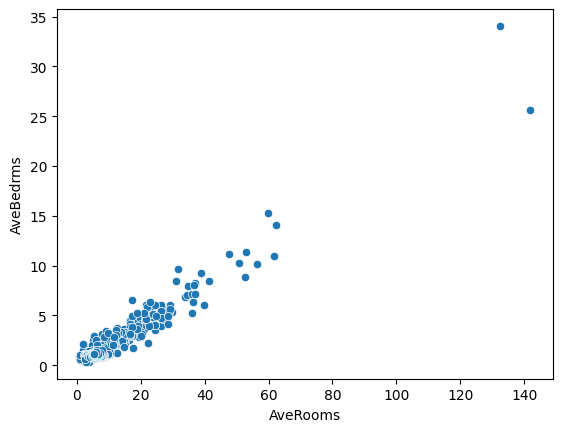

In [28]:
sns.scatterplot(data=df, x='AveRooms', y='AveBedrms')


In [29]:
df.query('AveRooms > 100')


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500


In [34]:
df.query('AveRooms > 100')




,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500


In [35]:
# Latitude と Longitude の列だけを表示
df_lat_long = df[['Latitude', 'Longitude']]

# 結果のデータフレームを表示
print(df_lat_long)

       Latitude  Longitude
0         37.88    -122.23
1         37.86    -122.22
2         37.85    -122.24
3         37.85    -122.25
4         37.85    -122.25
...         ...        ...
20635     39.48    -121.09
20636     39.49    -121.21
20637     39.43    -121.22
20638     39.43    -121.32
20639     39.37    -121.24

[20640 rows x 2 columns]


In [36]:

# AveRooms が 100 を超える行をフィルタリング
df_filtered = df.query('AveRooms > 100')

# Latitude と Longitude の列だけを表示
df_lat_long = df_filtered[['Latitude', 'Longitude']]

# 結果のデータフレームを表示
print(df_lat_long)

      Latitude  Longitude
1914     38.91    -120.10
1979     38.80    -120.08


In [38]:
import webbrowser


# 各緯度経度ペアについてGoogle MapsのURLを生成して開く
for latitude, longitude in zip(latitudes, longitudes):
    url = f"https://www.google.com/maps?q={latitude},{longitude}"
    webbrowser.open(url)


<Axes: >

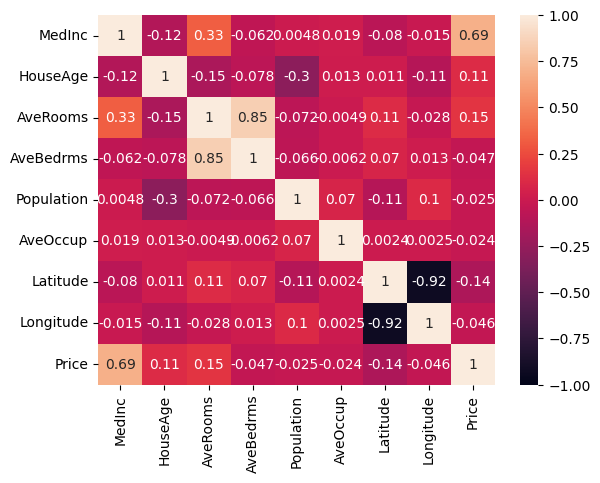

In [22]:
sns.heatmap(
    real_estate.corr(),
    vmax=1,vmin=-1,annot=True
    )
